In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\admin\AppData\Local\Temp\ipykernel_16196\3835989288.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df=pd.read_csv("C:\\Users\\admin\\Downloads\\Social_Network_Ads (1).csv")
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [20]:
def RemoveOutliers(df,var):
 Q1 = df[var].quantile(0.25)
 Q3 = df[var].quantile(0.75)
 IQR = Q3 - Q1
 high, low = Q3+1.5*IQR, Q1-1.5*IQR
 print("Highest allowed in variable:", var, high)
 print("lowest allowed in variable:", var, low)
 count = df[(df[var] > high) | (df[var] < low)][var].count()
 print('Total outliers in:',var,':',count)
 df = df[((df[var] >= low) & (df[var] <= high))]
 return df

In [7]:
df_x=df.iloc[:,[0,3]].values
df_y=df.iloc[:,4]
print(df_y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


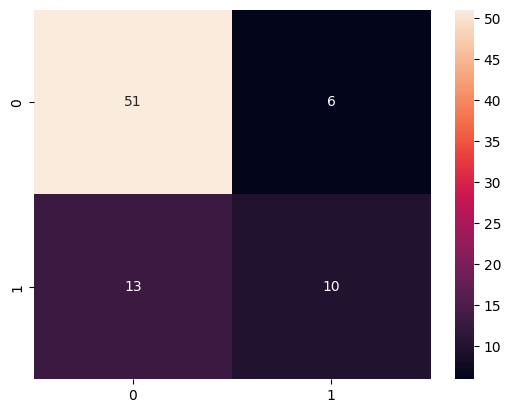

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        57
           1       0.62      0.43      0.51        23

    accuracy                           0.76        80
   macro avg       0.71      0.66      0.68        80
weighted avg       0.75      0.76      0.75        80



In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(df_x,df_y,test_size=0.20,random_state=13)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.show()
print(classification_report(ytest,ypred))

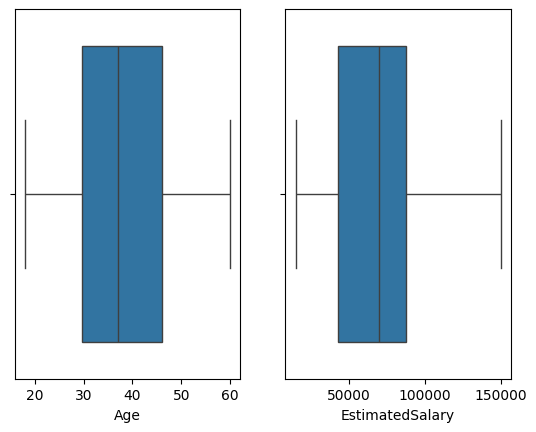

In [24]:

fig,axes=plt.subplots(1,2)

sns.boxplot(data=df,x='Age',ax=axes[0])
sns.boxplot(data=df,x='EstimatedSalary',ax=axes[1])
plt.show()


In [25]:

df=RemoveOutliers(df,'Age')
df=RemoveOutliers(df,'EstimatedSalary')

Highest allowed in variable: Age 70.375
lowest allowed in variable: Age 5.375
Total outliers in: Age : 0
Highest allowed in variable: EstimatedSalary 155500.0
lowest allowed in variable: EstimatedSalary -24500.0
Total outliers in: EstimatedSalary : 0


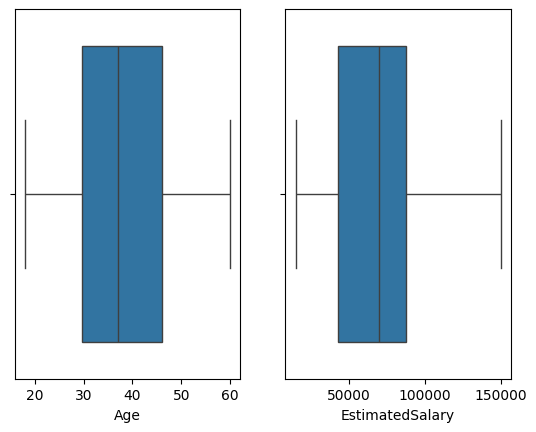

In [26]:
fig,axes=plt.subplots(1,2)

sns.boxplot(data=df,x='Age',ax=axes[0])
sns.boxplot(data=df,x='EstimatedSalary',ax=axes[1])
plt.show()


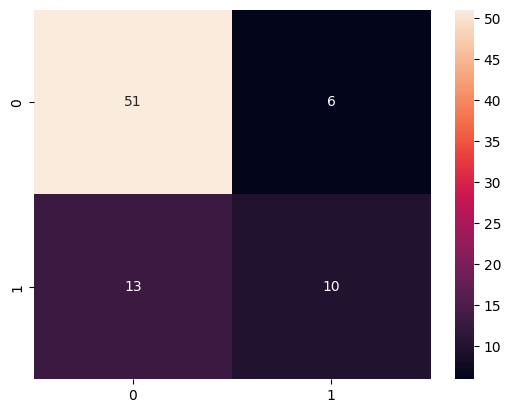

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        57
           1       0.62      0.43      0.51        23

    accuracy                           0.76        80
   macro avg       0.71      0.66      0.68        80
weighted avg       0.75      0.76      0.75        80



In [28]:
#confusion matrix after removing outliers

sns.heatmap(cm,annot=True)
plt.show()
print(classification_report(ytest,ypred))